In [6]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/python/3.10.8/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


# hello world

Epoch 1/50
5/5 [==============================] - 1s 33ms/step - loss: 0.6843 - accuracy: 0.5694 - val_loss: 0.6717 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6784 - accuracy: 0.5556 - val_loss: 0.6616 - val_accuracy: 0.6250
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.5139 - val_loss: 0.6531 - val_accuracy: 0.6250
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6687 - accuracy: 0.5139 - val_loss: 0.6451 - val_accuracy: 0.6250
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6630 - accuracy: 0.5139 - val_loss: 0.6387 - val_accuracy: 0.6250
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.6591 - accuracy: 0.5139 - val_loss: 0.6324 - val_accuracy: 0.6250
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6542 - accuracy: 0.5139 - val_loss: 0.6276 - val_accuracy: 0.6250
Epoch 8/50
5/5 [=================

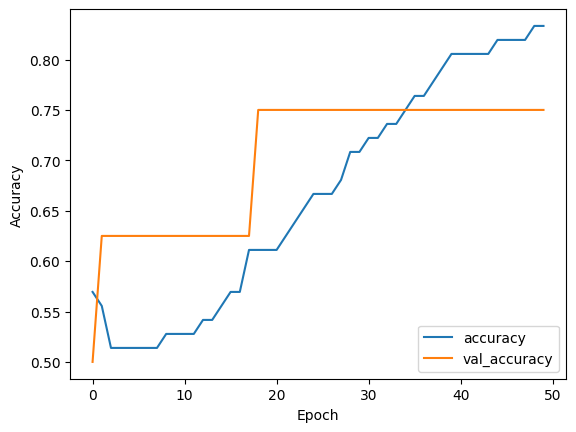

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples with 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary classification

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define a simple ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
